## Task 1.1.1 - kNN on Iris Dataset

Implement the k-Nearest Neighbor (kNN) algorithm from scratch using only NumPy. <br><br> You may use the provided sklearn functions to load datasets and evaluate your results. Use the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) for training and testing your model.

* Plot 2 samples per class to check on the data. **(RESULT)**
* Split the dataset into a training set (80%) and a test set (20%). Train your model on the training set and evaluate it on the test set using the accuracy score as a metric. Try at least 3 different values for k (e.g., 1, 3, 5) and report the results. **(RESULT)**

Note: Feature normalization might help to improve your results.

In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [25]:

iris = load_iris()
x = iris.data
y = iris.target









# Plot 2 samples per class

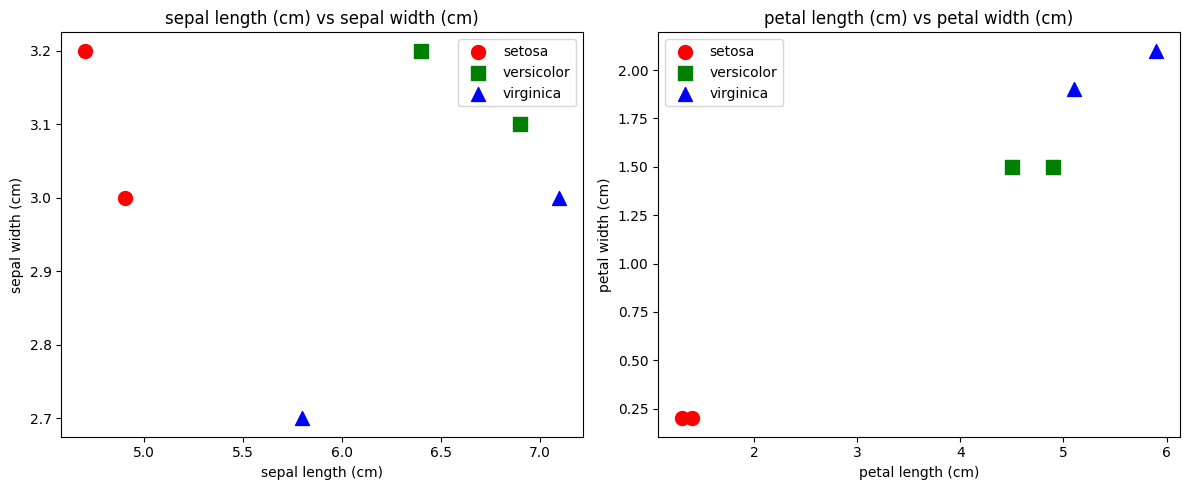

In [26]:
class_names = iris.target_names

x_class0 = x[y == 0][1:3]
x_class1 = x[y == 1][1:3]
x_class2 = x[y == 2][1:3]

samples = [x_class0, x_class1, x_class2]

class_samples = [x_class0, x_class1, x_class2]

plt.figure(figsize=(12, 5))

feature_pairs = [(0, 1), (2, 3)]

colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
for i, (feat_x, feat_y) in enumerate(feature_pairs, 1):
    plt.subplot(1, 2, i)
    for class_idx, samples in enumerate(class_samples):
        plt.scatter(samples[:, feat_x], samples[:, feat_y],
                    color=colors[class_idx], marker=markers[class_idx],
                    s=100, label=iris.target_names[class_idx])
    plt.xlabel(iris.feature_names[feat_x])
    plt.ylabel(iris.feature_names[feat_y])
    plt.title(f"{iris.feature_names[feat_x]} vs {iris.feature_names[feat_y]}")
    plt.legend()

plt.tight_layout()
plt.show()

# Split Data to 80% Train and 20% Test and Normalised using the Z-score approach

Z-core approach was chosen as it is less sensitive to outliers and supposedly keeps the relative distribution of data due to using the mean and standard deviation

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)


mean_train = X_train.mean(axis = 0)
std_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_train) / std_train
X_test_scaled = (X_test - mean_train) / std_train


# Build the KNNClassifier

In [28]:
class KNNClassifier:    # Do not rename
    """K-Nearest Neighbors classifier using only NumPy."""

    def __init__(self, k):
        """Initialize KNN classifier, providing k and the training data."""
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train_scaled , y_train):
        """Fit the model using the training data."""
        # TODO: Implement this function
        self.X_train = X_train_scaled
        self.y_train = y_train

    def eucDist(self, TestX, TrainX):
        return np.sqrt(np.sum((TestX - TrainX)**2)) # [0.5,0.3,0.9,2.1]



    def predict(self, X):
        """Predict classes for multiple samples."""
        X_labels = []
        for x in X:
          distances = []
          for TrainX in self.X_train:
              distances.append(self.eucDist(x, TrainX))
          distances= np.array(distances)
          k_idx = np.argsort(distances)[:self.k]


          k_neighbor_labels =  [self.y_train[i] for i in k_idx]
          # count=[]
          # for z in k_neighbor_labels:
          #   count.append(k_neighbor_labels.count(z))
          # X_labels.append(self.k_neighbor_labels[count.index(max(count))])

          most_occuring_value = max(k_neighbor_labels, key=k_neighbor_labels.count)
          X_labels.append(most_occuring_value)
        return X_labels





# Accuracy Measure

We wanted to get a sense of how accuracy is calculated so we defined our own function and did not use sklearn function

In [29]:
def accuracy_score(y_true, y_pred):
    n_correct = np.sum(y_true == y_pred)
    accuracy = n_correct / len(y_true)
    return accuracy

# Test with k=1

In [30]:
knnclassiris  = KNNClassifier(1)
knnclassiris.fit(X_train_scaled,y_train)
y_pred = knnclassiris.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred))


0.9666666666666667


# Test with k=3

In [31]:
knnclassiris  = KNNClassifier(3)
knnclassiris.fit(X_train_scaled,y_train)
y_pred = knnclassiris.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred))


0.9333333333333333


# Test with K=5

In [32]:
knnclassiris  = KNNClassifier(5)
knnclassiris.fit(X_train_scaled,y_train)
y_pred = knnclassiris.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred))

0.9333333333333333


# Test with K=7

In [33]:
knnclassiris  = KNNClassifier(7)
knnclassiris.fit(X_train_scaled,y_train)
y_pred = knnclassiris.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


 We implemented KNN using NumPy's basic functions (sqrt, sum, etc) without vectorization as the dataset was small enough to not cause performance issues and we wanted to get the basic sense of how KNN works. Vectorization, however, was implemented in the advanced assignment for the larger dataset.

Accuracy was higher at k=1,7 than at k=3,5. The pattern on Accuracy score as K increases made us search on a potential reason for it dropping at k=3, 5 specifically. One good reason that made sense is that at k=1, the closest neighbour is most probably correct so we have low bias, yet at k=3, 5, the neighbourhood might include points on the boundary from other classes and still does not have enough points to have their influence diluted. Yet at k=7, more points are included in the neighbourhood diluting the effect of the points from other classes.

## Task 1.1.2 - kNN on MNIST Dataset

* Run your NumPy-based kNN implementation on the [MNIST dataset](https://www.wikiwand.com/en/articles/MNIST_database). **(RESULT)**
* Report the accuracy of your model on a 20% test split and compare a k = {1,3}. **(RESULT)**
* Visualize 3 misclassified images. **(RESULT)**

Note: You may want touse a subset of the MNIST dataset to reduce computation time.

# Load the dataset

This time, we just scaled the features between [0.1] beacause all feature range between 0 and 255 anyways (no different ranges)

 Since a subset of the dataset is passed anyways, vectorization was not used as well here

In [34]:
from sklearn.datasets import fetch_openml

def load_mnist_subset(n_train=5000, n_test=1000):
    """Load a subset of MNIST dataset for faster computation."""
    # Load MNIST from OpenML
    mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto', as_frame=False)
    X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], train_size=n_train, test_size=n_test, random_state=42, stratify=mnist['target'])
    X_train = X_train / 255.0
    X_test  = X_test / 255.0

    return X_train, X_test, y_train, y_test


# Test with k=1

In [35]:
X_train, X_test, y_train, y_test = load_mnist_subset()

knnclass  = KNNClassifier(1)
knnclass.fit(X_train,y_train)
y_pred = knnclass.predict(X_test)
print(accuracy_score(y_test,y_pred))



0.933


# Test with K=3

In [36]:

knnclass  = KNNClassifier(3)
knnclass.fit(X_train,y_train)
y_pred = knnclass.predict(X_test)
print(accuracy_score(y_test,y_pred))



0.941


In [37]:
def visualizemiscalss(y_true, y_pred, x_test):

  c=0
  for i in range(0, len(y_true)):
    if c<3:
      if y_true[i] != y_pred[i]:
        plt.imshow(x_test[i].reshape(28,28),cmap='gray')
        plt.show()
        c+=1
    else:
        break







# Visualization

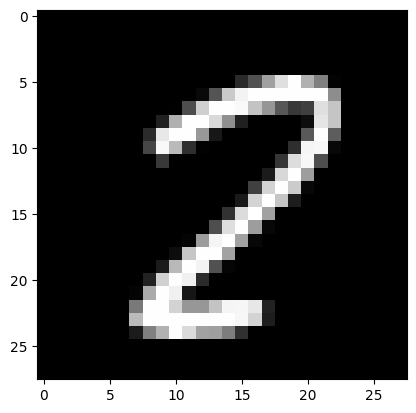

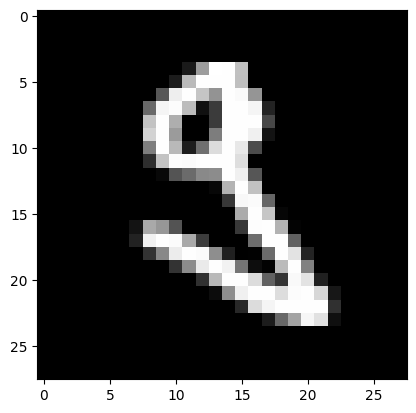

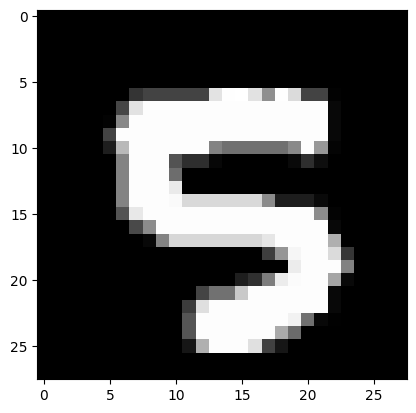

In [38]:
visualizemiscalss(y_test, y_pred, X_test)

We were confused about how does the 20% test split aligns with the 5000 and 1000 default subset size in the load function, so we followed this approach too for loading the data set which divides the original dataset to 80% train and 20% test and then takes the first n_train and n_test as subsets.

In [39]:

def load_mnist_subset(n_train=5000, n_test=1000):
   """Load a subset of MNIST dataset for faster computation."""
    # Load MNIST from OpenML
   mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto', as_frame=False)
   X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'],  test_size=0.2, random_state=42, stratify=mnist['target'])




   X_train = X_train[:n_train]
   y_train = y_train[:n_train]
   X_test  = X_test[:n_test]
   y_test  = y_test[:n_test]

   X_train = X_train / 255.0
   X_test  = X_test / 255.0

   return X_train, X_test, y_train, y_test

In [40]:
X_train, X_test, y_train, y_test = load_mnist_subset()

knnclass  = KNNClassifier(1)
knnclass.fit(X_train,y_train)
y_pred = knnclass.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.933


In [41]:

knnclass  = KNNClassifier(3)
knnclass.fit(X_train,y_train)
y_pred = knnclass.predict(X_test)
print(accuracy_score(y_test,y_pred))



0.941


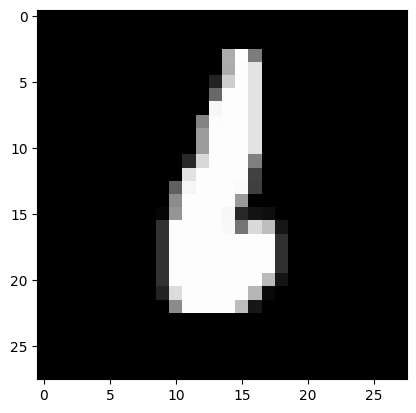

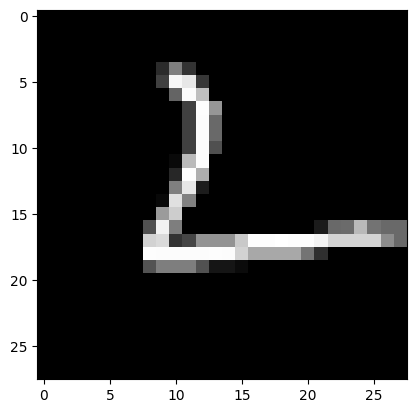

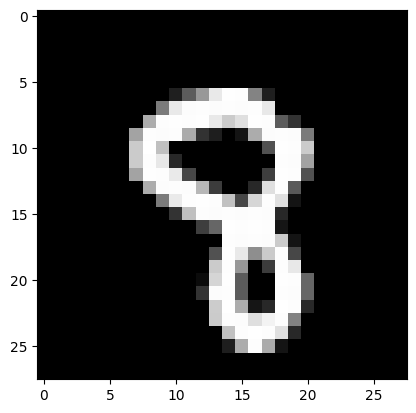

In [42]:
visualizemiscalss(y_test, y_pred, X_test)

 The reason behind accuracy at k=3 is higher than k=1 is probably because at k=1 the neighboorhood is very local and can be misclassified by a single noisy point but at k=3 its effect gets diluted by the frequency of the right data points (And by theory, as k increases (k=3) there is more generalization and the model is not memorizing the data)

## Congratz, you made it! :)